In [1]:
import pandas as pd  # Daten
from matplotlib import pyplot as plt  # plots
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter  # Numberformat plot ticks

# performance
from datetime import datetime
from datetime import date  # todays date

In [2]:

now = datetime.now()

# Linien
lws = 3
lwb = 7
# Größe
size = 25

# output Größe der Bilder
h = 16 * 1.3
v = 9
dpi = 200

today = date.today().strftime("%d.%m.%Y")

In [3]:
# Import
df = pd.read_csv("D:\\Github\\Auswertung_Covid_19\\input\\Impfungen_Timeseries.csv", sep=";")

# Berechnungen
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y', utc=True)
df["Erstimpfung_MA"] = df["Erstimpfung"].rolling(window=7, center=False, min_periods=7).mean()
df["Zweitimpfung_MA"] = df["Zweitimpfung"].rolling(window=7, center=False, min_periods=7).mean()
df["Drittimpfung_MA"] = df["Drittimpfung"].rolling(window=7, center=False, min_periods=7).mean()
df["Erstimpfung_cumsum"] = df["Erstimpfung"].cumsum()
df["Zweitimpfung_cumsum"] = df["Zweitimpfung"].cumsum()
df["Drittimpfung_cumsum"] = df["Drittimpfung"].cumsum()
df["Ziel"] = 83_000_000*0.85

df.to_csv("df export.csv")

In [4]:
ZweitimpfungenSumme = df["Zweitimpfung_cumsum"].iloc[-1]
ZweitimpfungenZiel85 = 83_000_000*0.85
ZweitimpfungenOffen = ZweitimpfungenZiel85 - ZweitimpfungenSumme
ZweitimpfungenProTag = df["Zweitimpfung_MA"].iloc[-1]
AnzahlTage85 = int(ZweitimpfungenOffen/ZweitimpfungenProTag)
Impfquote = int(100*(ZweitimpfungenSumme/83_000_000))

print(f'Impfquote = {Impfquote}')
print(f'ZweitimpfungenSumme = {ZweitimpfungenSumme}')
print(f'ZweitimpfungenZiel85 = {ZweitimpfungenZiel85}')
print(f'ZweitimpfungenOffen = {ZweitimpfungenOffen}')
print(f'ZweitimpfungenProTag = {ZweitimpfungenProTag}')
print(f'AnzahlTage85 = {AnzahlTage85}')

Impfquote = 70
ZweitimpfungenSumme = 58710106
ZweitimpfungenZiel85 = 70550000.0
ZweitimpfungenOffen = 11839894.0
ZweitimpfungenProTag = 41646.28571428572
AnzahlTage85 = 284


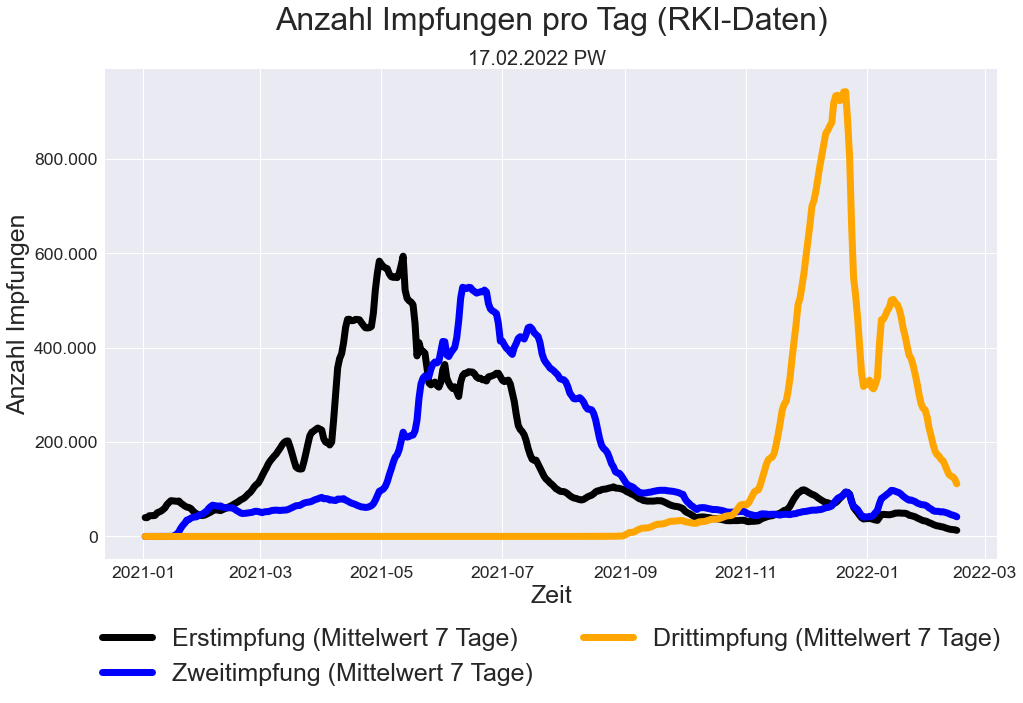

In [5]:
def y_axis_thousands(x, pos):
    # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",", ".")


formatter = FuncFormatter(y_axis_thousands)

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(16, 9))

ax.yaxis.set_major_formatter(formatter)

# plt.plot(df['Datum'],df['Erstimpfung'], color="black", linestyle = '', linewidth = lwb,
#                marker=".", markersize =size*0.5, alpha=0.7,
#                label = "Erstimpfung)") # blau, linie, dick
plt.plot(df['Datum'], df['Erstimpfung_MA'], color="black", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         label="Erstimpfung (Mittelwert 7 Tage)")  # blau, linie, dick

# plt.plot(df['Datum'],df['Zweitimpfung'], color="blue", linestyle = '', linewidth = lwb,
#                marker="*",  markersize =size*0.5,
#                label = "Zweitimpfung") # blau, linie, dick
plt.plot(df['Datum'], df['Zweitimpfung_MA'], color="blue", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         label="Zweitimpfung (Mittelwert 7 Tage)")  # blau, linie, dick

plt.plot(df['Datum'], df['Drittimpfung_MA'], color="orange", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5, alpha=1,
         label="Drittimpfung (Mittelwert 7 Tage)")  # blau, linie, dick


plt.xticks(fontsize=size * 0.7, rotation=0)
plt.yticks(fontsize=size * 0.7)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

if df["Zweitimpfung_MA"].iloc[-7] < df["Zweitimpfung_MA"].iloc[-1]:
#     plt.title(f'Anzahl Impfungen (RKI-Daten) - Ist: {Impfquote}% -> 85% in < {AnzahlTage85} Tagen\n', fontsize=size + 7)
    plt.title(f'Anzahl Impfungen pro Tag (RKI-Daten)\n', fontsize=size + 7)

    
else:
#     plt.title(f'Anzahl Impfungen (RKI-Daten) - Ist: {Impfquote}% -> 85% in > {AnzahlTage85} Tagen\n', fontsize=size + 7)
    plt.title(f'Anzahl Impfungen pro Tag (RKI-Daten)\n', fontsize=size + 7)

plt.suptitle(today + ' PW', fontsize=size - 5, y=0.91)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende
plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=2,
           fontsize=size,
           )

# ax2 = ax.twinx()

# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax2.xaxis.set_major_locator(locator)
# ax2.xaxis.set_major_formatter(formatter)

# ax.set_ylim(ymin=0)
# ax2.grid(None)

# plt.plot(df['Datum'], df['Erstimpfung_cumsum'], color="black", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          alpha=0.3,
#          label="Erstimpfung (kumuliert)")  # blau, linie, dick

# plt.plot(df['Datum'], df['Ziel'], color="green", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          alpha=0.3,
#          label="Ziel (kumulierte Impfungen)")

# plt.plot(df['Datum'], df['Zweitimpfung_cumsum'], color="blue", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          alpha=0.3,
#          label="Zweitimpfung (kumuliert)")  # blau, linie, dick

# plt.plot(df['Datum'], df['Drittimpfung_cumsum'], color="orange", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          alpha=0.3,
#          label="Drittimpfung (kumuliert)")  # blau, linie, dick

# plt.legend(loc='upper left',
#            bbox_to_anchor=(0.5, -0.1),
#            fancybox=True,
#            shadow=True,
#            ncol=1,
#            fontsize=size,
#            )

# ax2.set_ylabel("Anzahl Impfungen kumuliert", color="grey", fontsize=size)
# ax2.tick_params(labelsize=size * 0.7)

plt.savefig("D:\\Github\\Auswertung_Covid_19\\output\\Impfungen TS pro Tag.png", dpi=dpi, bbox_inches='tight')

# plt.show()


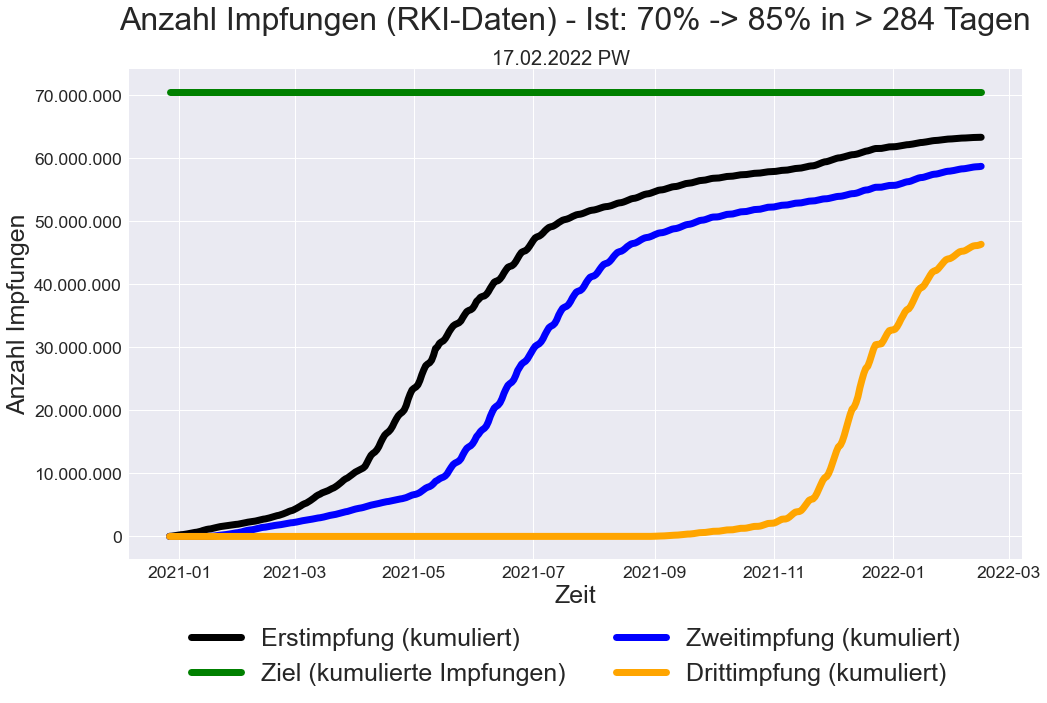

In [6]:
def y_axis_thousands(x, pos):
    # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",", ".")


formatter = FuncFormatter(y_axis_thousands)

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(16, 9))

ax.yaxis.set_major_formatter(formatter)

# # plt.plot(df['Datum'],df['Erstimpfung'], color="black", linestyle = '', linewidth = lwb,
# #                marker=".", markersize =size*0.5, alpha=0.7,
# #                label = "Erstimpfung)") # blau, linie, dick
# plt.plot(df['Datum'], df['Erstimpfung_MA'], color="black", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          label="Erstimpfung (Mittelwert 7 Tage)")  # blau, linie, dick

# # plt.plot(df['Datum'],df['Zweitimpfung'], color="blue", linestyle = '', linewidth = lwb,
# #                marker="*",  markersize =size*0.5,
# #                label = "Zweitimpfung") # blau, linie, dick
# plt.plot(df['Datum'], df['Zweitimpfung_MA'], color="blue", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5,
#          label="Zweitimpfung (Mittelwert 7 Tage)")  # blau, linie, dick

# plt.plot(df['Datum'], df['Drittimpfung_MA'], color="orange", linestyle='-', linewidth=lwb,
#          marker="", markersize=size * 0.5, alpha=1,
#          label="Drittimpfung (Mittelwert 7 Tage)")  # blau, linie, dick




plt.plot(df['Datum'], df['Erstimpfung_cumsum'], color="black", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         alpha=1,
         label="Erstimpfung (kumuliert)")  # blau, linie, dick

plt.plot(df['Datum'], df['Ziel'], color="green", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         alpha=1,
         label="Ziel (kumulierte Impfungen)")

plt.plot(df['Datum'], df['Zweitimpfung_cumsum'], color="blue", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         alpha=1,
         label="Zweitimpfung (kumuliert)")  # blau, linie, dick

plt.plot(df['Datum'], df['Drittimpfung_cumsum'], color="orange", linestyle='-', linewidth=lwb,
         marker="", markersize=size * 0.5,
         alpha=1,
         label="Drittimpfung (kumuliert)")  # blau, linie, dick

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=2,
           fontsize=size,
           )





plt.xticks(fontsize=size * 0.7, rotation=0)
plt.yticks(fontsize=size * 0.7)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

if df["Zweitimpfung_MA"].iloc[-7] < df["Zweitimpfung_MA"].iloc[-1]:
    plt.title(f'Anzahl Impfungen (RKI-Daten) - Ist: {Impfquote}% -> 85% in < {AnzahlTage85} Tagen\n', fontsize=size + 7)
else:
    plt.title(f'Anzahl Impfungen (RKI-Daten) - Ist: {Impfquote}% -> 85% in > {AnzahlTage85} Tagen\n', fontsize=size + 7)

plt.suptitle(today + ' PW', fontsize=size - 5, y=0.91)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende
# plt.legend(loc='upper right',
#            bbox_to_anchor=(0.5, -0.1),
#            fancybox=True,
#            shadow=True,
#            ncol=1,
#            fontsize=size,
#            )

# ax2 = ax.twinx()

# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax2.xaxis.set_major_locator(locator)
# ax2.xaxis.set_major_formatter(formatter)

# ax.set_ylim(ymin=0)
# ax2.grid(None)



# ax2.set_ylabel("Anzahl Impfungen kumuliert", color="grey", fontsize=size)
# ax2.tick_params(labelsize=size * 0.7)

plt.savefig("D:\\Github\\Auswertung_Covid_19\\output\\Impfungen TS kumuliert.png", dpi=dpi, bbox_inches='tight')

# plt.show()
